# **GNNs Usinbg Python: Chapter 02 - Basic Graph Theory**

*Author: Rafael Rodríguez Palomo*

*January, 2024*

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Defining Graphs with networkx**

In [35]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

### Undirected vs. Directed Graphs

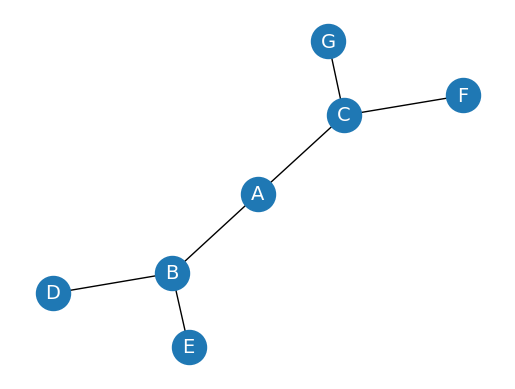

In [13]:
# Undirecetd Graph
G = nx.Graph()
G.add_edges_from([('A', 'B'), ('A', 'C'), ('B', 'D'), ('B', 'E'), ('C', 'F'), ('C', 'G')])

plt.axis('off')
nx.draw_networkx(G, pos=nx.spring_layout(G, seed=0), node_size=600, font_size=14, font_color='white')

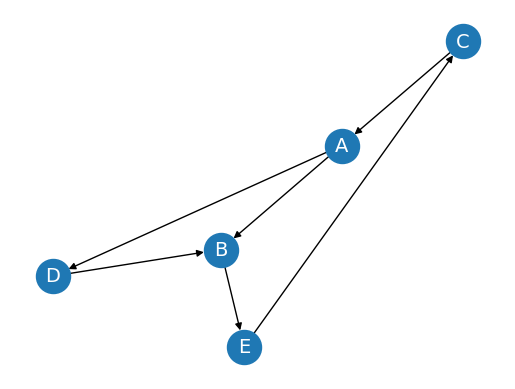

In [14]:
# Directed Graph
diG = nx.DiGraph()
diG.add_edges_from([('A', 'B'), ('C', 'A'), ('A', 'D'), ('D', 'B'), ('B', 'E'), ('E', 'C')])

plt.axis('off')
nx.draw_networkx(diG, pos=nx.spring_layout(diG, seed=0), node_size=600, font_size=14, font_color='white')

### Wighted vs. Unweighted Graphs

{('A', 'B'): Text(-0.17063150397490368, -0.25785521234238246, '10'),
 ('A', 'C'): Text(0.16908485308194388, 0.2584267536065791, '20'),
 ('B', 'D'): Text(-0.5751319512575159, -0.5819114840781281, '30'),
 ('B', 'E'): Text(-0.3070875406419613, -0.7577069745265291, '4.5'),
 ('C', 'F'): Text(0.5743060275721562, 0.5815239318372771, '1'),
 ('C', 'G'): Text(0.3081446719975651, 0.7583070963940803, '0.5')}

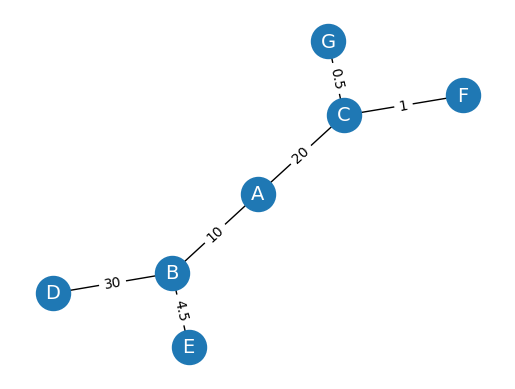

In [19]:
# Weighted Graphs
weightedG = nx.Graph()
weightedG.add_edges_from([('A', 'B', {'weight':10}), ('A', 'C', {'weight':20}), ('B', 'D', {'weight':30}),
                          ('B', 'E', {'weight':4.5}), ('C', 'F', {'weight':1}), ('C', 'G', {'weight':0.5})])

plt.axis('off')
nx.draw_networkx(weightedG, pos=nx.spring_layout(weightedG, seed=0), node_size=600, font_size=14, font_color='white')
label = nx.get_edge_attributes(weightedG, 'weight')
nx.draw_networkx_edge_labels(weightedG, pos=nx.spring_layout(G, seed=0), edge_labels=label)

### Connected and Unconnected Graphs

A graph is connected **if and only if** there exists a path between avery pair of nodes $u$ - $v$ (i.e.: there are not isolated nodes).

Is G1 connected? False
Is G2 connected? True


Text(0.5, 1.0, 'Connected Graph')

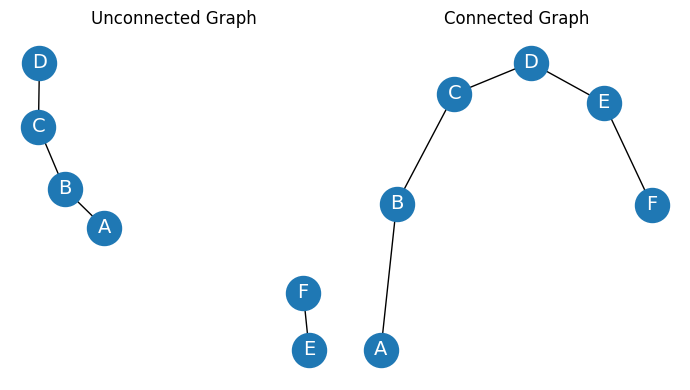

In [30]:
# Unconnected Graph
G1 = nx.Graph()
G1.add_edges_from([('A', 'B'), ('B', 'C'), ('C', 'D'), ('E', 'F')])

# Connected Graph
G2 = nx.Graph()
G2.add_edges_from([('A', 'B'), ('B', 'C'), ('C', 'D'), ('D', 'E'), ('E', 'F')])

print(f"Is G1 connected? {nx.is_connected(G1)}")
print(f"Is G2 connected? {nx.is_connected(G2)}")

fig, axes = plt.subplots(1, 2, figsize=(7, 4), layout='tight')
nx.draw(G1, ax=axes[0], pos=nx.spring_layout(G1, seed=0), with_labels=True, node_size=600, font_size=14, font_color='white')
axes[0].set_title('Unconnected Graph')

nx.draw(G2, ax=axes[1], pos=nx.spring_layout(G2, seed=0), with_labels=True, node_size=600, font_size=14, font_color='white')
axes[1].set_title('Connected Graph')

### Others

The library networkx includes a plethora of types of graphs that can be generated (i.e.: DAGs, trees, random graphs, etc.). For the sake of simplicity we do not include here an example of every type of graph. Check the [docs](https://networkx.org/documentation/stable/reference/index.html) for further reference.

## **Fundamental Objects**

### Degree, Indegree and Outdegree

The concept of degree is colesly related to the concept of **neighbors**. Two nodes are neighbors if they are connected by an edge, thus, the degree of a node is the same as the number of neighbors.

Two nodes are **adjacent** if the share at least one common neighbor.

In [31]:
# Degree of an undirected graph
G = nx.Graph()
G.add_edges_from([('A', 'B'), ('A', 'C'), ('B', 'D'), ('B', 'E'), ('C', 'F'), ('C', 'G')])

degree_A = G.degree['A']
print(f"Degree of node A: {degree_A}") # Number of edges connected to node A

Degree of node A: 2


In [33]:
# Indegree and outdegree of directed graph
diG = nx.DiGraph()
diG.add_edges_from([('A', 'B'), ('C', 'A'), ('A', 'D'), ('D', 'B'), ('B', 'E'), ('E', 'C')])

indegree_A = diG.in_degree['A']
outdegree_A = diG.out_degree['A']

print(f"Indegree of node A: {indegree_A}") # Edges converging into A
print(f"Outdegree of node A: {outdegree_A}") # Edges sourcing from A

Indegree of node A: 1
Outdegree of node A: 2


### Paths

A path is a sequence of edges that connects tow or more nodes, the length of the path is the number of edges traversed along the path. There are several types of paths, the most important ones are:

- **Simple path:** nodes are visited only once along the sequence.
- **Cycle:** the first and last nodes of the sequence are the same one.

## **Graph Measures: Centrality**

The most important graph measure is the **centrality** of a node. The centrality measure helps identifying important nodes in the grpah by means of the degree or the path to other nodes. We can identify several centralities:

- **Degree Centrality:** most common one, represent the connectivity of a node. High degree centrality indicates a highly important node.
- **Closeness Centrality:** reciprocal of the average length of the shortest path between the target node and all the other nodes in the graph. It is usually normalized by $N-1$ to enable for comparison with other graphs. High closeness centrality indicates high importance (the node is close to every node)
- **Betweenness Centrality**: number of times a node lies on the shortest path between pair os nodes. High betweenness centrality indicates that the node is a bottleneck in the graph.

The importance of a node depends on the centrality measure we use.

In [34]:
G = nx.Graph()
G.add_edges_from([('A', 'B'), ('A', 'C'), ('B', 'D'), ('B', 'E'), ('C', 'F'), ('C', 'G')])

degree_c = nx.degree_centrality(G)
closeness_c = nx.closeness_centrality(G)
betweenness_c = nx.betweenness_centrality(G)

print(f"Degree Centrality: {degree_c}")
print(f"Closeness Centrality: {closeness_c}")
print(f"Betweenness Centrality: {betweenness_c}")

Degree Centrality: {'A': 0.3333333333333333, 'B': 0.5, 'C': 0.5, 'D': 0.16666666666666666, 'E': 0.16666666666666666, 'F': 0.16666666666666666, 'G': 0.16666666666666666}
Closeness Centrality: {'A': 0.6, 'B': 0.5454545454545454, 'C': 0.5454545454545454, 'D': 0.375, 'E': 0.375, 'F': 0.375, 'G': 0.375}
Betweenness Centrality: {'A': 0.6, 'B': 0.6, 'C': 0.6, 'D': 0.0, 'E': 0.0, 'F': 0.0, 'G': 0.0}


### Density

Indicates how connected is a graph (value between $0$ and $1$). it is the ratio between the number of edges and the maximum possible number of edges the we could add to the graph. The maximum number of edges for a directed graph is different from the number of maximum possible edges of an undirected graph.

The density is closely related to how we represent the adjacency matrix.

## **Representing Grpahs**

There are three main ways of representing and storing a graph:
- **Adjacency Matrix:** $N$x$N$ square matrix ($N$ is the number of nodes) where a $1$ represent an edge between nodes $i$ and $j$. It is symmetric for undirected graphs but it does not need to be symmetric for directed graphs.

  - **Advantages**: easy to vizualize, efficient to test the existance of a node and usefull to perform matrix operations.
  - **Disadvantages**: space complexity (more nodes more space needed to store it).

- **Edge List:** list of pairs of vertices or tuples representing connected nodes.

  - **Advantages**: efficient way of storing sparse graphs (E << V).
  - **Disadvantages**: not efficient to test for the existance of an edge.

- **Adjacency List:** list of pairs where each nodes represents a node in the grpah and its adjacent nodes.

  - **Advantages**: lower space complexity than the adjacency matrix and it allows for efficient iteration through adjacent vertices.
  - **Disadvantages**: not efficient to test for the existance of an edge.

In [42]:
# Adjacency Matrix
G1 = np.array([[0, 1, 1], [1, 0, 1], [1, 1, 0]])
print(f"Adjacency Matrix: \n{G1}")

# Edge List
G2 = [(0, 1), (1, 2), (2, 0)]
print(f"Edge List: {G2}")

# Adjacency List
G3 = {
    0: [1, 2],
    1: [0, 2],
    2: [0, 1],
}
print(f"Adjacency List: {G3}")

Adjacency Matrix: 
[[0 1 1]
 [1 0 1]
 [1 1 0]]
Edge List: [(0, 1), (1, 2), (2, 0)]
Adjacency List: {0: [1, 2], 1: [0, 2], 2: [0, 1]}


## **Graph Algorithms: Breadth-First and Depth-First**

Both are two traversal algorithms used in graph search and path finding. These two algorithms are the base for Dijkstra's weighted graph shortest path search.

### BFS: Breadth-First Search

It starts at the root node and explores every possible node at that level before moving to the next level.

It is usefull in finding the shortest path between the starting node and another one because it visits each node based on the distance to the starting node, so the firts time it encounters the target node it is ensured that it is the shortest path. It is also usefull when finding if a graph is connected or not.

Main drawback is it time complexity ($O(V+E)$) which make this algorithm not suitable when dealing with sparse or highly connected graphs.

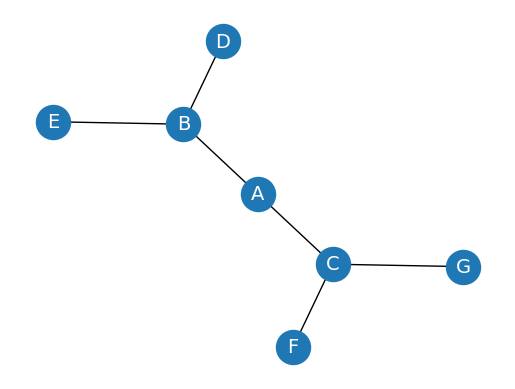

In [45]:
G = nx.Graph()
G.add_edges_from([('A', 'B'), ('A', 'C'), ('B', 'D'), ('B', 'E'), ('C', 'F'), ('C', 'G')])

plt.axis('off')
pos = pos = nx.kamada_kawai_layout(G)
nx.draw_networkx(G, pos=pos, node_size=600, font_size=14, font_color='white')

In [46]:
def bfs(graph, node):
  visited = [node] # Visted nodes list
  queue = [node] # Queue list

  while queue: # While there are elements in the queue
    node = queue.pop(0) # Get the first one
    for neighbor in graph[node]: # Explore its neighbours
      if neighbor not in visited:
        visited.append(neighbor) # Add neighbor to visited list
        queue.append(neighbor) # Add neighbor to queue

  return visited

In [47]:
visited = bfs(G, 'A')
print(visited)

['A', 'B', 'C', 'D', 'E', 'F', 'G']


### DFS: Depth-First Search

Recursive algorithm that traverses a complete branch before backtracking to go through another branch. This formulation makes it usefull for finding connected components, doing topological sorting and solving maze problems.

However, time complexity is the same as in BFS.

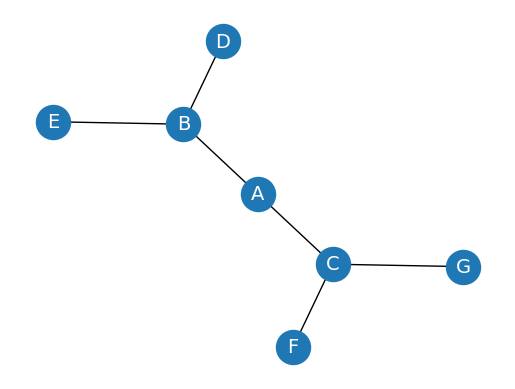

In [48]:
G = nx.Graph()
G.add_edges_from([('A', 'B'), ('A', 'C'), ('B', 'D'), ('B', 'E'), ('C', 'F'), ('C', 'G')])

plt.axis('off')
pos = pos = nx.kamada_kawai_layout(G)
nx.draw_networkx(G, pos=pos, node_size=600, font_size=14, font_color='white')

In [63]:
def dfs(graph, node, visited):
  visited.append(node)

  for neighbor in graph[node]:
    if neighbor not in visited:
      dfs(graph, neighbor, visited)

In [64]:
visited = []
dfs(G, 'A', visited)
print(visited)

['A', 'B', 'D', 'E', 'C', 'F', 'G']
